Import the tidyverse.

In [2]:
library('tidyverse')
options(repr.plot.width=4, repr.plot.height=3)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Bars

Let's use the "diamonds" data set. Preview the first five rows of the diamonds dataset using the `head` function.  
(*Hint: try* `?head` *to get the help page for the* `head` *function*)

In [19]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


Make a bar chart of the "cut" column. About how many rows are there for the cut category "Ideal"?

In [40]:
p=ggplot(diamonds,aes(x=cut))
p=p+geom_bar()

diamonds$cut %>% table

.
     Fair      Good Very Good   Premium     Ideal 
     1610      4906     12082     13791     21551 

There are  21551 Ideal rows.

Use `coord_flip` to rotate the chart by 90 degrees. 

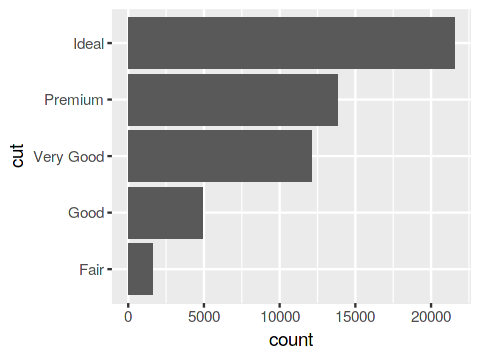

In [41]:
(p = p + coord_flip())

# Lines

We'll use flight data from the Bureau of Transportation Statistics
https://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&Link=0

In [27]:
# uncomment the following:

library(nycflights13)
flight.data = flights %>%
     group_by(month, carrier, year) %>%
     summarize(N_flights = n()) %>%
     filter(carrier %in% c('UA', 'AA', 'US'))

head(flight.data)
nrow(flight.data)
ncol(flight.data)

month,carrier,year,N_flights
<int>,<chr>,<int>,<int>
1,AA,2013,2794
1,UA,2013,4637
1,US,2013,1602
2,AA,2013,2517
2,UA,2013,4346
2,US,2013,1552


[1] 36

[1] 4

What are the columns in `flight.data`? (*Hint: preview the table*)

There are 4 columns.

First, make a bar chart of the `carrier` column? Does this make sense?

.
AA UA US 
12 12 12 

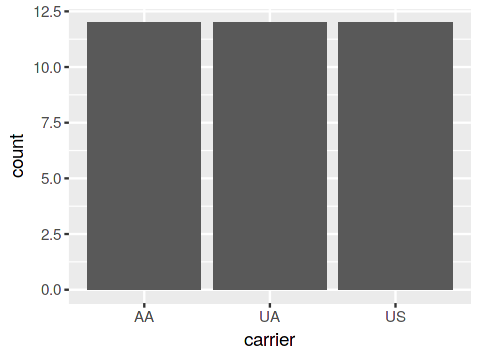

In [29]:
p=ggplot(flight.data,aes(x=carrier))
p=p+geom_bar()

p

flight.data$carrier %>% table

This makes sense since this means that there are 12 flight data rows corresponding to each airline, but it doesn't help because it has one count for each airline in each month, so it doesn't tell us much.

Plot month versus number of flights grouped according to carrier.

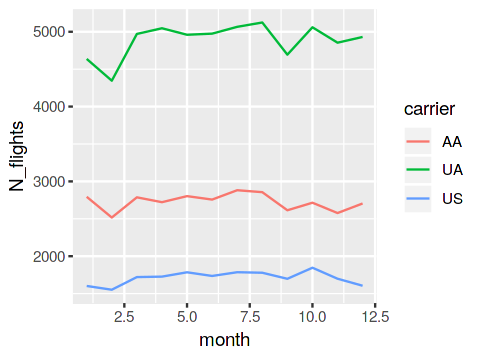

In [42]:
p = ggplot(flight.data, aes(x = month, y = N_flights, color = carrier))

p = p + geom_line(size=2)

p

# Smooth

Plot a scatter plot (`geom_point`) of carat versus price with the diamonds dataset.

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


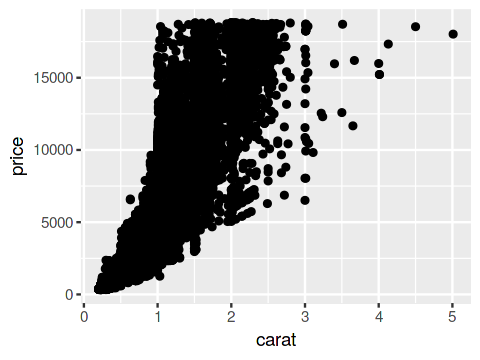

In [47]:
head(diamonds)

p = ggplot(diamonds, aes(x = carat, y = price))

p = p + geom_point()

p

There is a lot of overplotting in this figure. Make the same plot but use the `alpha` value to reduce
the opacity of the points.  
(*Hint: alpha values can be set from 0 (transparent) to 1 (opaque)*)

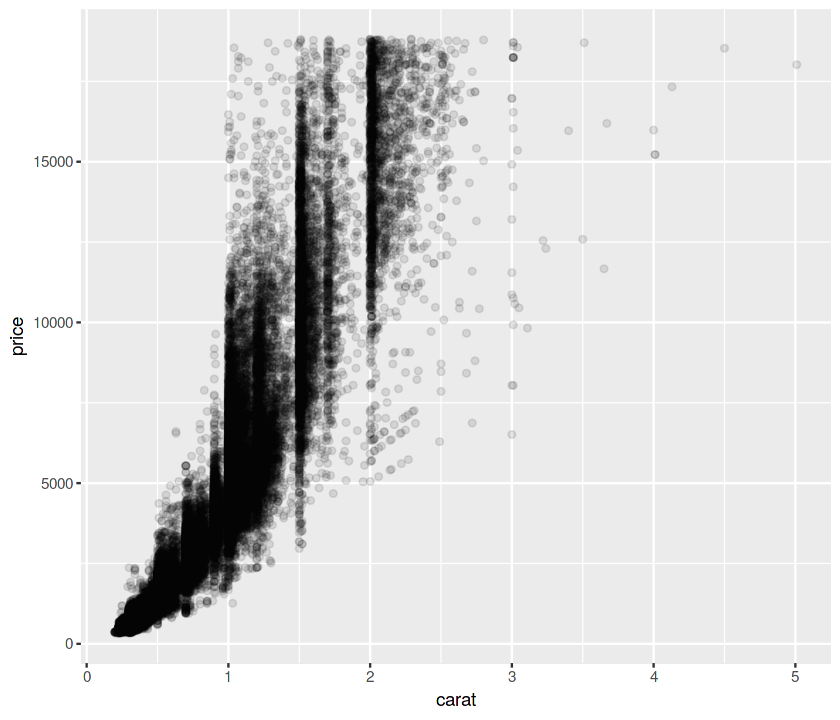

In [53]:
p = ggplot(diamonds, aes(x = carat, y = price))
p = p + geom_point(alpha=0.1) #, shape=".")
p

Facetting can also help with overplotting. Facet the chart by `cut`.

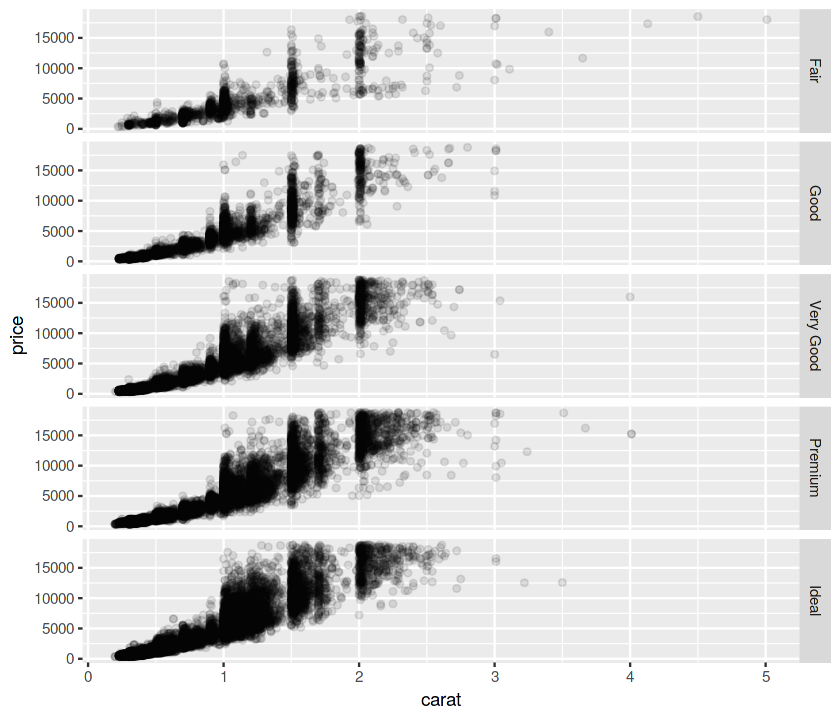

In [55]:
options(repr.plot.width=7, repr.plot.height=6)
p + facet_grid(cut ~ .)

Add a `geom_smooth` to your facetted plot to emphasize the trend in the data.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



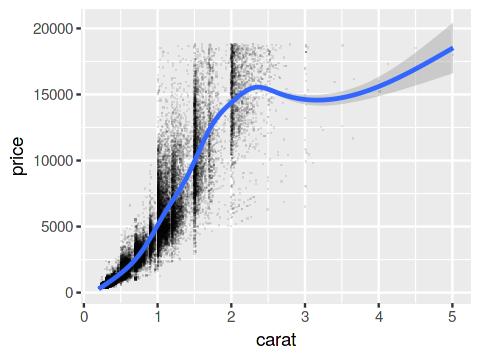

In [51]:
(p=p+geom_smooth())
# can do independent loess for each factor you do

# Tiles

This is a dataset of otter skull morphology.

In [56]:
# uncomment the following:
otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
     gather(characteristic, value, -species, -museum, -accession)

otter.data %>% head

species,museum,accession,characteristic,value
<fct>,<fct>,<fct>,<chr>,<dbl>
A. cinerea,AMNH,101458,m1,15.100
A. cinerea,AMNH,101461,m1,12.740
A. cinerea,AMNH,101466,m1,12.425
A. cinerea,AMNH,101635,m1,13.400
A. cinerea,AMNH,101459,m1,14.400
A. cinerea,AMNH,101462,m1,14.525


Make a bar chart of the museum column. What is this chart telling you?

.
       AMNH       Burke Smithsonian        TAMU 
        216         594          72          18 

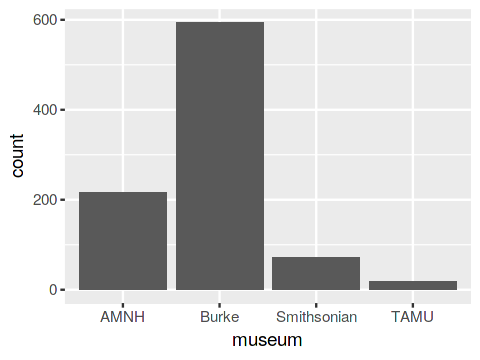

In [58]:
options(repr.plot.width=4, repr.plot.height=3)
p=ggplot(otter.data,aes(x=museum))
p=p+geom_bar()
p
otter.data$museum %>% table

This is telling us how many samples of otter skulls each museum has.

Make a heatmap of the data with `characteristic` on the x-axis and `species` on the y-axis.

In [ ]:
# uncomment this to get a scaled version of the data:

otter.data.scaled = otter.data %>%
     group_by(characteristic) %>%
     mutate(value.scaled = scales::rescale(value))

otter.data.scaled %>% head


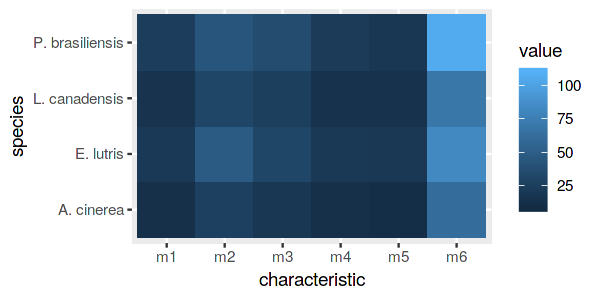

In [59]:
options(repr.plot.width=5, repr.plot.height=2.5)

p = ggplot(otter.data, aes(x = characteristic, y = species, fill = value))

p = p + geom_tile()

p

What can you do to make the chart more visually appealing?
- make the `color` white
- use `scale_fill_gradient(low = "white", high = "steelblue")`

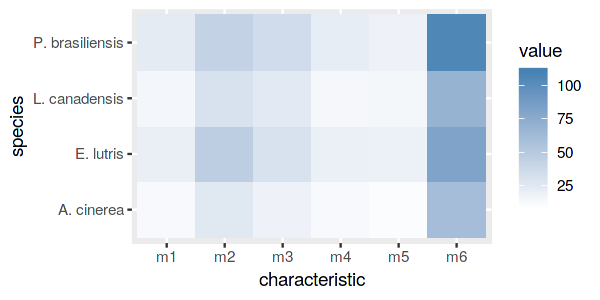

In [61]:
p = ggplot(otter.data, aes(x = characteristic, y = species, fill = value))

p = p + geom_tile()
p = p+scale_fill_gradient(low="white", high="steelblue")

p

# Points with jitter

Let's stick with the otter data. We could also use a point+jitter plot to represent the data. Make a point+jitter plot below with species on the x-axis, value on the y-axis, and facet the chart by characteristic. 

In [ ]:
options(repr.plot.width=4, repr.plot.height=3)
p = ggplot(mpg, aes(x = class, y = hwy))

p = p + geom_point()

p

Make the axis test legible by rotating the text 45 degrees.

What happens if you pass the argument `scales='free_y` to `facet_wrap`?

Do you prefer the heatmap or the point+jitter plot?